<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#Boston-House-Prices" data-toc-modified-id="Boston-House-Prices-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Boston House Prices</a></span></li><li><span><a href="#Preparation" data-toc-modified-id="Preparation-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Preparation</a></span></li><li><span><a href="#Reading-data" data-toc-modified-id="Reading-data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Reading data</a></span></li><li><span><a href="#Data-preprocessing" data-toc-modified-id="Data-preprocessing-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Data preprocessing</a></span><ul class="toc-item"><li><span><a href="#Splitting" data-toc-modified-id="Splitting-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Splitting</a></span></li><li><span><a href="#Scaling" data-toc-modified-id="Scaling-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Scaling</a></span></li></ul></li><li><span><a href="#Sklearn-Linear-Regression" data-toc-modified-id="Sklearn-Linear-Regression-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Sklearn Linear Regression</a></span><ul class="toc-item"><li><span><a href="#Fitting" data-toc-modified-id="Fitting-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Fitting</a></span></li><li><span><a href="#Evaluation" data-toc-modified-id="Evaluation-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Evaluation</a></span></li><li><span><a href="#Cross-validation" data-toc-modified-id="Cross-validation-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Cross-validation</a></span></li></ul></li><li><span><a href="#Keras-Linear-Regression" data-toc-modified-id="Keras-Linear-Regression-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Keras Linear Regression</a></span><ul class="toc-item"><li><span><a href="#Fitting" data-toc-modified-id="Fitting-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Fitting</a></span></li><li><span><a href="#Evaluation" data-toc-modified-id="Evaluation-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Evaluation</a></span></li></ul></li><li><span><a href="#Linear-Regression-via-GD-from-scratch" data-toc-modified-id="Linear-Regression-via-GD-from-scratch-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Linear Regression via GD from scratch</a></span><ul class="toc-item"><li><span><a href="#Data" data-toc-modified-id="Data-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Data</a></span></li><li><span><a href="#Fitting" data-toc-modified-id="Fitting-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Fitting</a></span></li><li><span><a href="#Evaluation" data-toc-modified-id="Evaluation-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>Evaluation</a></span></li></ul></li><li><span><a href="#Assignment" data-toc-modified-id="Assignment-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Assignment</a></span><ul class="toc-item"><li><span><a href="#Random-search" data-toc-modified-id="Random-search-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>Random search</a></span></li><li><span><a href="#Numerical-check" data-toc-modified-id="Numerical-check-8.2"><span class="toc-item-num">8.2&nbsp;&nbsp;</span>Numerical check</a></span></li><li><span><a href="#Stochastic-Gradient-Descent" data-toc-modified-id="Stochastic-Gradient-Descent-8.3"><span class="toc-item-num">8.3&nbsp;&nbsp;</span>Stochastic Gradient Descent</a></span></li><li><span><a href="#L1-and-L2-regularization-for-Linear-Regression" data-toc-modified-id="L1-and-L2-regularization-for-Linear-Regression-8.4"><span class="toc-item-num">8.4&nbsp;&nbsp;</span>L1 and L2 regularization for Linear Regression</a></span></li></ul></li><li><span><a href="#Optional-Assignments:" data-toc-modified-id="Optional-Assignments:-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Optional Assignments:</a></span><ul class="toc-item"><li><span><a href="#Line-Search-of-the-step-size" data-toc-modified-id="Line-Search-of-the-step-size-9.1"><span class="toc-item-num">9.1&nbsp;&nbsp;</span>Line Search of the step size</a></span></li></ul></li></ul></div>

# Boston House Prices

In this notebook we're going to build a basic predictive regression model for estimating the house prices in thousands of $ given some housing factors such as crime rate in neighborhood, number of schools % lower status of the population etc.

# Preparation

Import required libraries

In [1]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.cross_validation import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

/opt/conda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Set style for plotting

In [2]:
sns.set(style="whitegrid", font_scale=1.3)
matplotlib.rcParams["legend.framealpha"] = 1
matplotlib.rcParams["legend.frameon"] = True

Fix random seed for reproducibility

In [3]:
np.random.seed(42)

# Reading data

Boston dataset is extremely common in machine learning experiments thus it is embedded in sklearn.

In [4]:
boston = load_boston()

Detailed description of dataset and features

In [5]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

Create pandas dataframe with objects in rows and features in columns

In [6]:
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target

In [7]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [8]:
X.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


Note that some of the features are catecorical and some are continious

Let's also take a look into correlation matrix of features

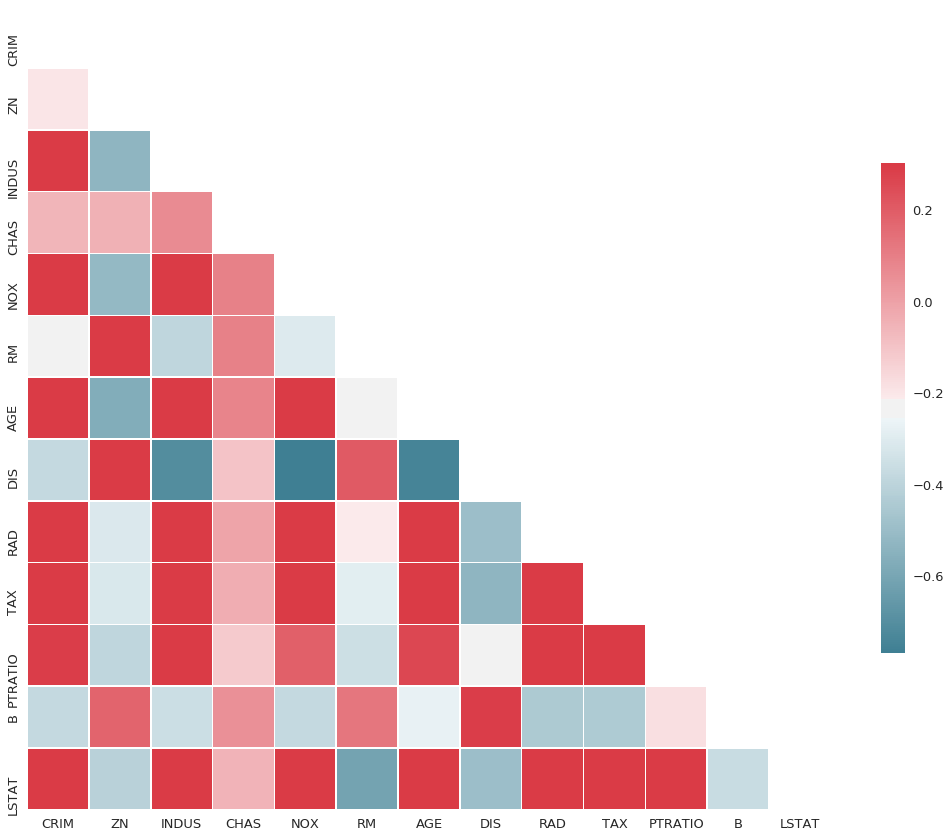

In [9]:
# compute the correlation matrix
corr = X.corr()

# generate a mask for the lower triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 18))

# generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3,
            square=True, 
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax);

# Data preprocessing

## Splitting

Let's split our data to train and test set in fraction of $\frac{4}{1}$

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

There are lots of feature, let's visualize two of them

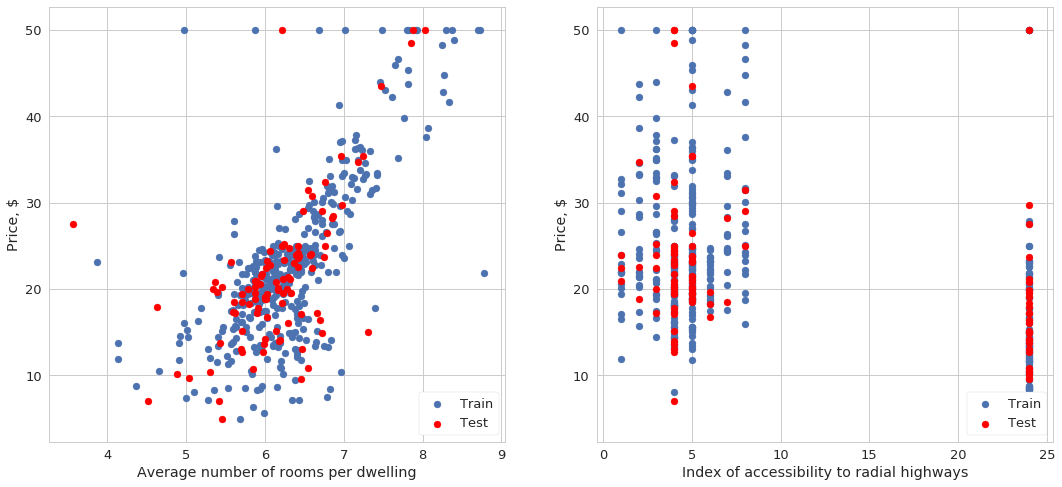

In [11]:
plt.figure(figsize=(18, 8))
plt.subplot(121)
plt.scatter(X_train.RM, y_train, label="Train")
plt.scatter(X_test.RM, y_test, c="r", label="Test")
plt.xlabel("Average number of rooms per dwelling")
plt.ylabel("Price, $")
plt.legend(loc="lower right", frameon=True)
plt.subplot(122)
plt.scatter(X_train.RAD, y_train, label="Train")
plt.scatter(X_test.RAD, y_test, c="r", label="Test")
plt.xlabel("Index of accessibility to radial highways")
plt.ylabel("Price, $")
plt.legend(loc="lower right");

## Scaling

Let's also do normalization to the range of $(0; 1)$ to make our data insensitive to the scale of features

In [12]:
scaler = MinMaxScaler()

Note that we're going to learn normalization constants only on training set. That's done because the assumption is that test set is unreachable during training.

In [13]:
X_train = scaler.fit_transform(X_train)

Transform test set with the same constants

In [14]:
X_test = scaler.transform(X_test)

# Sklearn Linear Regression

## Fitting

Here we use very simple Linear Regression model. Scikit-learn uses the closed-form solition for Linear Regression problem thus it gives very good results.

In [15]:
model_sk = LinearRegression()

Fitting model on prepared data

In [16]:
model_sk.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## Evaluation

Let's see what features are significant for the model

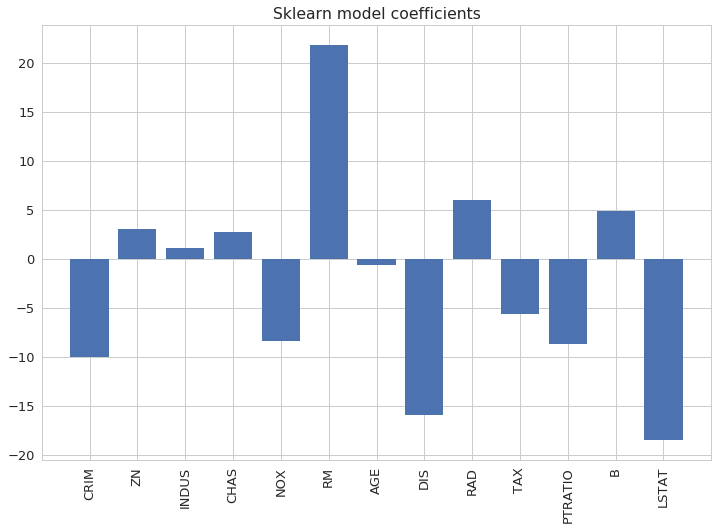

In [17]:
plt.figure(figsize=(12, 8))
plt.bar(np.arange(model_sk.coef_.shape[0]), model_sk.coef_)
plt.xticks(np.arange(model_sk.coef_.shape[0]), X.columns, rotation='vertical')
plt.xlim([-1, model_sk.coef_.shape[0]])
plt.title("Sklearn model coefficients");

In [18]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

Predicting both train and test sets to evaluate model

In [19]:
preds_test = model_sk.predict(X_test)
preds_train = model_sk.predict(X_train)

There is no MAPE implementation in sklearn (because this metric is undefined when real value is zero). Below one can find my own implementation

In [20]:
def mean_absolute_percentage_error(y_true, y_pred): 
    """
    Use of this metric is not recommended because can cause division by zero
    See other regression metrics on sklearn docs:
      http://scikit-learn.org/stable/modules/classes.html#regression-metrics
    Use like any other metric
    >>> y_true = [3, -0.5, 2, 7]; y_pred = [2.5, -0.3, 2, 8]
    >>> mean_absolute_percentage_error(y_true, y_pred)
    Out[]: 24.791666666666668
    """

    return np.mean(np.abs((y_true.ravel() - y_pred.ravel()) / y_true.ravel())) * 100

Let's evaluate our model according to three different metrics:
* MAE (Mean Absolute Error)
* RMSE (Root Mean Squared Error)
* MAPE (Mean Absolute Percentage Error)

In [21]:
metrics = [mean_absolute_error, 
           lambda y_true, y_pred: mean_squared_error(y_true, y_pred) ** 0.5, 
           mean_absolute_percentage_error]
metrics_names = ["MAE", 
                 "RMSE", 
                 "MAPE"]

Also we want to check quality on both train and test sets

In [22]:
samples = [(X_train, y_train), 
           (X_test, y_test)]
models_names = ["Sklearn"]

Let's do it in loop

In [23]:
models_names = ["Sklearn"]

In [24]:
def evaluate(models, metrics, samples, metrics_names, models_names):
    results = np.zeros((len(samples) * len(models), len(metrics)))
    samples_names = []
    for m in models_names:
        samples_names.extend([m + " Train", m + " Test"])
    for m_num, model in enumerate(models):
        for row, sample in enumerate(samples):
            for col, metric in enumerate(metrics):
                results[row + m_num * 2, col] = metric(sample[1], model.predict(sample[0]))
    results = pd.DataFrame(results, columns=metrics_names, index=samples_names)
    return results

In [25]:
models = [model_sk]

Evaluated metrics:

In [26]:
evaluate(models, metrics, samples, metrics_names, models_names)

,MAE,RMSE,MAPE
Sklearn Train,3.315165,4.652051,16.573489
Sklearn Test,3.191509,4.930662,16.880585


It also interesting to take a look how the predicted points relate to real ones. All the points should lie on the black dotted line ($y=x$) assuming that our model is perfect

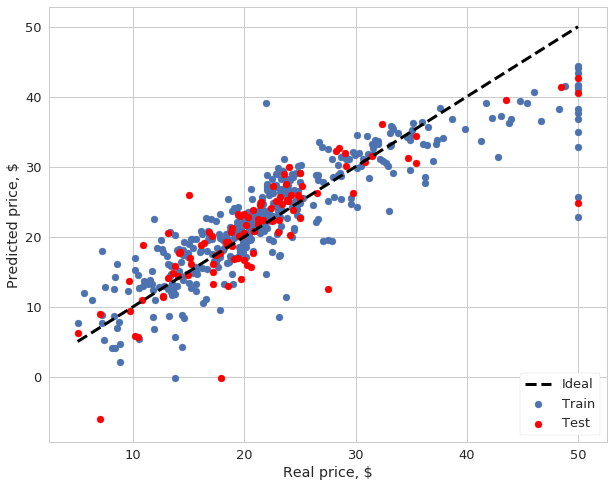

In [27]:
plt.figure(figsize=(10, 8))
plt.scatter(y_train, preds_train, label="Train")
plt.scatter(y_test, preds_test, c="r", label="Test")
plt.xlabel("Real price, $")
plt.ylabel("Predicted price, $")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=3, label="Ideal")
plt.legend(loc="lower right");

## Cross-validation

The common method to evaluate the model is cross-validation. The idea behind it is to divide the whole set of objects into $k$ sections and then use one section as a test set and other $k-1$ as a train (repeat it with all the sections).

There is a special function for this in sklearn called $\text{KFold}$. It creates set of indices for cross-validation.

In [28]:
cv = KFold(n=len(X), n_folds=5, shuffle=True, random_state=42)

Next step is to do everything that we've done before in a loop:
* Split
* Scale
* Train
* Evaluate

And store the average value of the errors ($\text{res}$ variable)

In [29]:
res = None
for train_idx, test_idx in cv:
    # split
    X_train, X_test = X.values[train_idx], X.values[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
    
    # scale
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    samples_cv = [(X_train, y_train), 
                  (X_test, y_test)]
    
    # fit
    model_sk_cv = LinearRegression().fit(samples_cv[0][0], samples_cv[0][1])
    
    # evaluate
    if res is None:
        res = evaluate([model_sk_cv], metrics, samples_cv, metrics_names, ["Sklearn CV"])
    else:
        res += evaluate([model_sk_cv], metrics, samples_cv, metrics_names, ["Sklearn CV"])
# take the average value across all folds
res /= cv.n_folds

Here is the result of CV

In [30]:
res

,MAE,RMSE,MAPE
Sklearn CV Train,3.269853,4.660627,16.423244
Sklearn CV Test,3.390748,4.843271,17.026372


# Keras Linear Regression

Linear Regression model can be seen as a neural network withour hidden layer and any activation function

In [31]:
from keras.layers import Dense, Input
from keras.models import Model

Using TensorFlow backend.


Number of features in Boston dataset is 13. Thus the input layer has 13 units. We want to predict only one value - price of the house. Therefore output layer has only one unit.

In [32]:
inp = Input(shape=(13,))
out = Dense(1)(inp)

Usual Linear Regression is done by means of solving Ordinary Least Square Error problem which means that one should one squared (mse) loss.

Here we also choose the simplest optimizer - usual stohastic gradient descent.

In [33]:
model_keras = Model(inputs=[inp], outputs=[out])
model_keras.compile(loss="mse", optimizer="sgd", metrics=["mae"])

Split into train and test set (with the same $\text{random_state}$ which means we can compare results)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Scaling

In [35]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Fitting

In [36]:
hist = model_keras.fit(X_train, y_train, 
                       validation_data=(X_test, y_test), 
                       epochs=300, verbose=0)

Mean Absolute Error (MAE) evolution during training

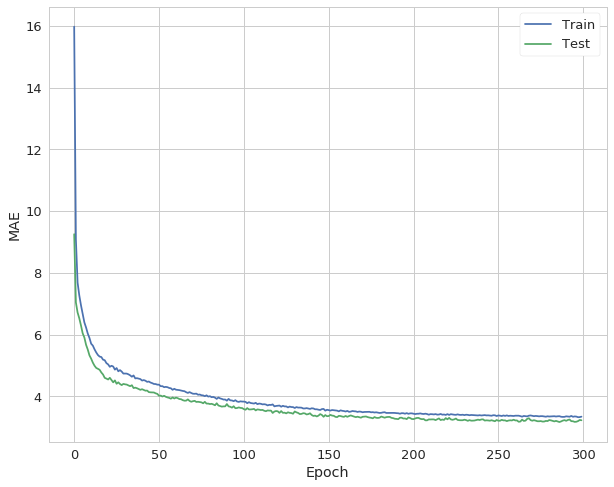

In [37]:
plt.figure(figsize=(10, 8))
plt.plot(hist.history["mean_absolute_error"], label="Train")
plt.plot(hist.history["val_mean_absolute_error"], label="Test")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("MAE");

## Evaluation

In [38]:
models = [model_sk, model_keras]
models_names = ["Sklearn", "Keras"]

In [39]:
evaluate(models, metrics, samples, metrics_names, models_names)

,MAE,RMSE,MAPE
Sklearn Train,3.315165,4.652051,16.573489
Sklearn Test,3.191509,4.930662,16.880585
Keras Train,3.349017,4.846047,16.885045
Keras Test,3.229179,5.186921,17.483062


**Notice** that sklearn results are a bit better because it uses closed-form solution

# Linear Regression via GD from scratch

The objective function of linear regression is the following:
$$
f(\mathbf{w}, b) = \frac{1}{n}\sum_{i=1}^{n}\left[ (\mathbf{w}\cdot\mathbf{x}_i + b) - y_i\right]^2,\\
n = \left|X_{\text{train}}\right|
$$
So we want to minimize the **squared value** of difference between predictions and real answers. It is called Mean Squared Error (MSE). Gradient Descent is the way of optimizing this complex functional and tune weigths $\mathbf{w}$ and bias $b$.

To be able to treat weigths $\mathbf{w}$ and bias $b$ homogeneously we're going to augment the data with the "shell" feature (all $1$'s). Then we can add one more parameter to the weight vector and treat it as a *bias*.
$$
\mathbf{x}' :=
\begin{bmatrix}
\mathbf{x}\\
1
\end{bmatrix},\quad
\boldsymbol{\theta} :=
\begin{bmatrix}
\mathbf{w}\\
b
\end{bmatrix}
\\
f(\boldsymbol{\theta}) = \frac{1}{n}\sum_{i=1}^{n}\left[ \boldsymbol{\theta}\cdot\mathbf{x}'_i - y_i\right]^2
$$
In this way it is much more easier to carry out oprimization process.

To simplify it further and do it in "*tensor*" way let's rewrite it in matrix form. Let's introduce data matrix (the same as dataframe we used everywhere above)

$$
\text{X}' =
\begin{bmatrix}
\mathbf{x'}_1^{\text{T}}\\
\vdots\\
\mathbf{x'}_n^{\text{T}}
\end{bmatrix},\quad
\mathbf{y} = 
\begin{bmatrix}
y_1\\
\vdots\\
y_n
\end{bmatrix}
$$

Matrix $\text{X}$ contains objects in its rows and features in its columns. Vector $\mathbf{y}$ is a vector of answers. Then the objective can be rewritten as follows:

$$
f(\boldsymbol{\theta}) = \frac{1}{n}\|\text{X}'\cdot \boldsymbol{\theta} - \mathbf{y}\|_2^2
$$

Then the gradient can be easily calculated in vectorized form:

$$
\nabla_{\boldsymbol{\theta}} f(\boldsymbol{\theta}) = \frac{2}{n}\,\text{X}'^{\text{T}}\left(\text{X}'\cdot \boldsymbol{\theta} - \mathbf{y}\right)
$$

Exactly this computations are implemented down below in **BasicLinearRegressionHomegrown** class

## Data

Split into train and test set (with the same $\text{random_state}$ which means we can compare results)

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Scaling

In [41]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Basic version of homegrown Linear Regression

In [42]:
class BasicLinearRegressionHomegrown(object):
    
    def __init__(self):
        self.coef_ = None       # weight vector
        self.intercept_ = None  # bias term
        self._theta = None      # augmented weight vector, i.e., bias + weights
                                # this allows to treat all decision variables homogeneously
        self.history = {"cost": [], 
                        "coef": [], 
                        "intercept": [], 
                        "grad": []}
        
    def _grad(self, X, y):
        """
        Calculate the gradient of the objective function

        Args:
            X(ndarray):        train objects
            y(ndarray):        answers for train objects
        Return:
            gradient(ndarray): analytical gradient vector
        """
        pred = np.dot(X, self._theta)
        error = pred - y
        gradient = 2 * np.dot(error, X) / X.shape[0]
        return gradient
    
    # full gradient descent, i.e., not stochastic gd
    def _gd(self, X, y, max_iter, alpha=0.0005):
        """
        Runs GD and logs error, weigths, gradient at every step

        Args:
            X(ndarray):      train objects
            y(ndarray):      answers for train objects
            max_iter(int):   number of weight updates
            alpha(floar):    step size in direction of gradient
        Return:
            None
        """
        for i in range(max_iter):
            self.history["coef"].append(self._theta[1:].copy())
            self.history["intercept"].append(self._theta[0].copy())
            
            rmse = self.score(X, y)
            self.history["cost"].append(rmse)

            # calculate gradient
            grad = self._grad(X, y)
            self.history["grad"].append(grad)
            
            # do gradient step
            self._theta -= alpha * grad
    
    def fit(self, X, y, max_iter=1000):
        """
        Public API for fitting a linear regression model

        Args:
            X(ndarray):      train objects
            y(ndarray):      answers for train objects
            max_iter(int):   number of weight updates
        Return:
            self
        """
        # Augment the data with the bias term.
        # So we can treat the the input variables and the bias term homogeneously 
        # from a vectorization perspective
        X = np.c_[np.ones(X.shape[0]), X]
        # initialize if the first step
        if self._theta is None:
            self._theta = np.random.rand(X.shape[1])
        
        # do full gradient descent
        self._gd(X, y, max_iter)
        
        self.intercept_ = self._theta[0]
        self.coef_ = self._theta[1:]
        return self
        
    def score(self, X, y):
        """
        Calculate RMSE metric

        Args:
            X(ndarray):      objects
            y(ndarray):      answers
        Return:
            rmse(float):     RMSE
        """
        pred = self.predict(X)
        error = pred - y
        rmse = (np.sum(error ** 2) / X.shape[0]) ** 0.5
        return rmse
        
    def predict(self, X):
        """
        Make a prediction

        Args:
            X(ndarray):      objects
        Return:
            pred(ndarray):   predictions
        """
        # check whether X has appended bias feature or not
        if X.shape[1] == len(self._theta):
            pred = np.dot(X, self._theta)
        else:
            pred = np.dot(X, self.coef_) + self.intercept_
        return pred

Create model

In [43]:
model_homegrown = BasicLinearRegressionHomegrown()

## Fitting

In [44]:
model_homegrown.fit(X_train, y_train, max_iter=40000)

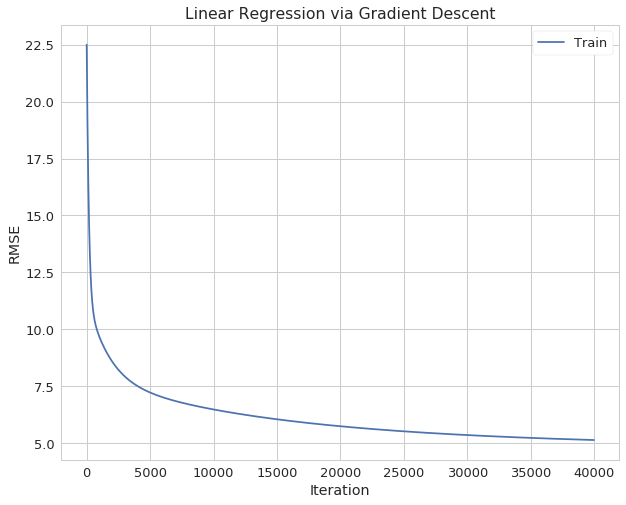

In [45]:
plt.figure(figsize=(10, 8))
plt.plot(model_homegrown.history["cost"], label="Train")
plt.xlabel("Iteration")
plt.ylabel("RMSE")
plt.title("Linear Regression via Gradient Descent")
plt.legend();

## Evaluation

In [46]:
models = [model_sk, model_keras, model_homegrown]
models_names = ["Sklearn", "Keras", "Homegrown"]

In [47]:
evaluate(models, metrics, samples, metrics_names, models_names)

,MAE,RMSE,MAPE
Sklearn Train,3.315165,4.652051,16.573489
Sklearn Test,3.191509,4.930662,16.880585
Keras Train,3.349017,4.846047,16.885045
Keras Test,3.229179,5.186921,17.483062
Homegrown Train,3.565231,5.143644,17.480025
Homegrown Test,3.395532,5.308220,18.273178


# Assignment

## Random search

* Implement random search algorithm for Linear Regression as a child of **BasicLinearRegressionHomegrown** class. Then you need to reimplement only solution method (change GD to Random Search)
* Compare its performance with the previous implementations

Random search algorithm consists of the following steps:
1. Sample a set of weigths from some distribution. Here we're going to use Uniform distribution.
$$
\boldsymbol{\Theta} = \{\boldsymbol{\theta}_1, \boldsymbol{\theta}_2 \ldots \boldsymbol{\theta}_{N}\}
$$
2. Now we have a set of weights $\boldsymbol{\Theta}$ for Linear Regression. The idea is to choose the best one according to the objective.
$$
\boldsymbol{\theta^*} = \underset{\boldsymbol{\Theta}}{\text{argmin}} \sum_{i=1}^{n}\left[\boldsymbol{\theta} \cdot \mathbf{x_i} - y_i\right]^2
$$

In [48]:
class RandomSearchLinearRegressionHomegrown(BasicLinearRegressionHomegrown):
    
    def __init__(self):
        # call the constructor of the parent class
        super(RandomSearchLinearRegressionHomegrown, self).__init__()
        self.history = {"cost": [], 
                        "coef": [], 
                        "intercept": []}
        
    def _rs(self, X, y, max_iter):
        """
        Runs Random Search and logs error and weigths at every step

        Args:
            X(ndarray):      train objects
            y(ndarray):      answers for train objects
            max_iter(int):   number of points to sample
        Return:
            None
        """
        
        # use the following numpy command to generate
        # random sample from the weight space
        sampled_weights = np.random.random(size=(max_iter, len(self._theta))) * 20 - 10
        
        # go ahead and choose the best of sampled weights
        # according to the objective
        
        #==================================================#
        #               Place your code here               #
        #==================================================#
        
        # error for each theta
        # in this case error is a matrix with size [max_iter * number of examples]
        errors = np.dot(sampled_weights, X.T) - np.atleast_2d(y)
        # mse for each theta
        mses = np.mean((errors) ** 2, axis = 1)
        # best theta is the one with smallest error
        best_idx = np.argmin(mses)
        # get it!
        self._theta = sampled_weights[best_idx]
        
    
    def fit(self, X, y, max_iter=1000):
        """
        Public API for fitting a linear regression model

        Args:
            X(ndarray):      train objects
            y(ndarray):      answers for train objects
            max_iter(int):   number of points to sample
        Return:
            self
        """
        X = np.c_[np.ones(X.shape[0]), X]
        if self._theta is None:
            self._theta = np.random.rand(X.shape[1])
        
        self._rs(X, y, max_iter)
        
        self.intercept_ = self._theta[0]
        self.coef_ = self._theta[1:]

Create model

In [49]:
model_homegrown_rs = RandomSearchLinearRegressionHomegrown()

Fitting

In [50]:
model_homegrown_rs.fit(X_train, y_train, max_iter=10000)

Evaluation

In [51]:
models = [model_sk, model_homegrown, model_homegrown_rs]
models_names = ["Sklearn", "Homegrown Full GD", "Homegrown RS"]

In [52]:
evaluate(models, metrics, samples, metrics_names, models_names)

,MAE,RMSE,MAPE
Sklearn Train,3.315165,4.652051,16.573489
Sklearn Test,3.191509,4.930662,16.880585
Homegrown Full GD Train,3.565231,5.143644,17.480025
Homegrown Full GD Test,3.395532,5.308220,18.273178
Homegrown RS Train,5.609579,7.557010,30.970630
Homegrown RS Test,5.355862,6.884777,31.920727


## Numerical check
* **BasicLinearRegressionHomegrown** class provides you with the method *_grad* that allows to compute analytical gradient. This function is correct
* Inheret from this class and implement a method for numerical approximation of gradient (see placeholder below)
* Check your function by comparing with the analytical one. They **should** be similar.
* Plot the difference of analytical and numerical gradients and describe what you observe

The formula for analytical gradient (from calculus):

$$
\nabla f(\mathbf{x}) = 
\begin{bmatrix}
\frac{\partial f}{\partial x_1}\\
\vdots\\
\frac{\partial f}{\partial x_m}
\end{bmatrix}, \text{ where } m \text{ is the space dimension}\\
\frac{\partial f}{\partial x_1} = \lim_{\alpha \rightarrow 0} \frac{f(x_1 + \alpha, x_2 \ldots x_m) - f(x_1, x_2 \ldots x_m)}{\alpha}
$$

For sufficiently small $\alpha$ one can approximate partial derivative by simple throwing out the limit operator

$$
\frac{\partial f}{\partial x_1} \approx \frac{f(x_1 + \alpha, x_2 \ldots x_m) - f(x_1, x_2 \ldots x_m)}{\alpha} = \left( \frac{\partial f}{\partial x_1} \right)_{\text{num}}\\
$$

Then the final approximation of the gradient is:

$$
\nabla f(\mathbf{x}) \approx \nabla_{\text{num}\,\,} f(\mathbf{x}) = \begin{bmatrix}
\left( \frac{\partial f}{\partial x_1} \right)_{\text{num}}\\
\vdots\\
\left( \frac{\partial f}{\partial x_m} \right)_{\text{num}}
\end{bmatrix}
$$

The common way of measuring the difference between vectors is the following:
$$
\text{er} = \frac{\|\nabla f(\mathbf{x}) - \nabla_{\text{num}\,\,}f(\mathbf{x})\|_2^2}{\|\nabla f(\mathbf{x})\|_2^2} = \frac{\sum_{j=1}^{m}\left(\nabla^j f(\mathbf{x}) - \nabla^j_{\text{num}\,\,}f(\mathbf{x})\right)^2}{\sum_{j=1}^{m}\left(\nabla^j f(\mathbf{x})\right)^2}
$$

In [53]:
class TweakedLinearRegressionHomegrown(BasicLinearRegressionHomegrown):
    
    def __init__(self):
        # call the constructor of the parent class
        super(TweakedLinearRegressionHomegrown, self).__init__()
        self.history["grad_num"] = []
        
    @staticmethod
    def _gradient_approximation(f, x):
        """
        Returns the numerical gradient of the function f at the point x

        Args:
            f(callable): function that takes the point x as an input 
                         and returns the value of the function
            x(ndarray): numpy array which contains the coordinates 
                        of the point to evaluate gradient
        Return:
            grad_num(ndarray): the numerical approximation 
                               of the gradient
        """

        grad_num = np.zeros(len(x))

        alpha = 0.001
        for i in range(len(x)):
            h = np.zeros(len(x))
            h[i] += alpha
            grad_num[i] = (f(x + h) - f(x)) / alpha

        return grad_num
    
    def _grad_num(self, X, y):
        """
        Returns the numerical gradient of the LinearRegression 
        objective function

        Args:
            X(ndarray): train objects
            y(ndarray): answers for train objects
        Return:
            grad_num(ndarray): the numerical approximation 
                               of the gradient
        """
        
        grad_num = np.zeros(X.shape[1])
        
        def f(a):
            pred = np.dot(X, a)
            error = pred - y
            mse = np.mean(error ** 2)
            return mse
            
        
        grad_num = self._gradient_approximation(f, self._theta)
        
        return grad_num
    
    def _gd(self, X, y, max_iter, alpha=0.001):
        """
        Runs GD and logs error, weigths, gradient and 
        numerical gradient at every step

        Args:
            X(ndarray):      train objects
            y(ndarray):      answers for train objects
            max_iter(int):   number of EPOCHS, i.e., full passes over data
            batch_size(int): number of samples in one batch
            alpha(floar):    step size in direction of gradient
        Return:
            None
        """
        for i in range(max_iter):
            self.history["coef"].append(self._theta[1:].copy())
            self.history["intercept"].append(self._theta[0].copy())
            
            rmse = self.score(X, y)
            self.history["cost"].append(rmse)

            grad = self._grad(X, y)
            self.history["grad"].append(grad)
            
            grad_num = self._grad_num(X, y)
            self.history["grad_num"].append(grad_num)
            
            self._theta -= alpha * grad

Create model

In [54]:
model_homegrown_check_grad = TweakedLinearRegressionHomegrown()

Fitting

In [55]:
model_homegrown_check_grad.fit(X_train, y_train, max_iter=40000)

Plotting error curves

In [56]:
grad_num = np.array(model_homegrown_check_grad.history["grad_num"])
grad = np.array(model_homegrown_check_grad.history["grad"])

In [57]:
def relative_error(grad, grad_num):
    return np.sum((grad - grad_num) ** 2, axis=1) * 1. / np.sum(grad ** 2, axis=1)

In [58]:
def absolute_error(grad, grad_num):
    return np.sum((grad - grad_num) ** 2, axis=1) * 1.

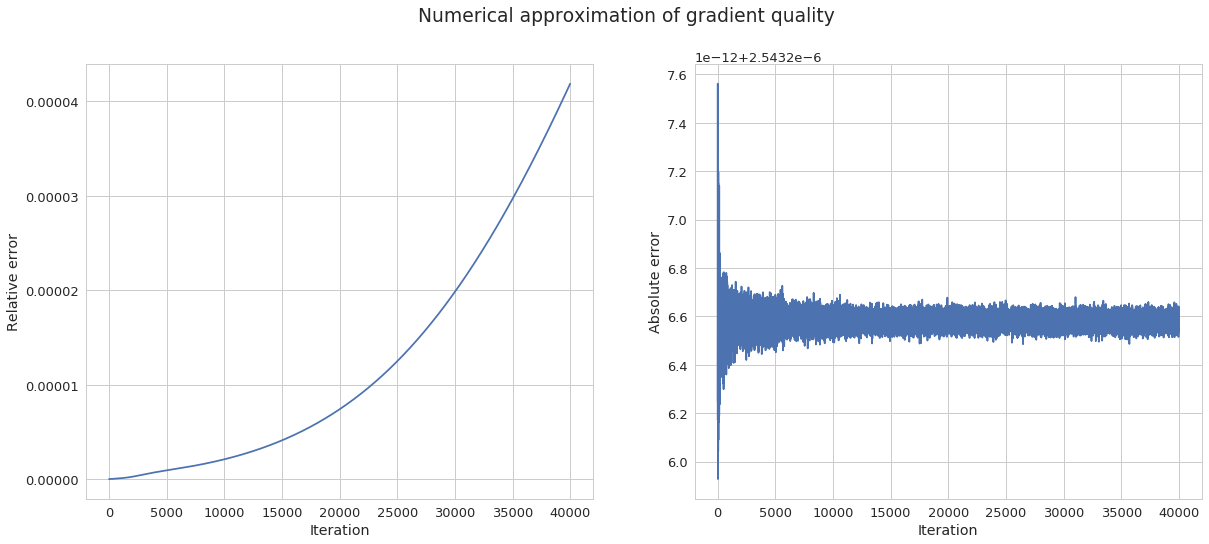

In [59]:
plt.figure(figsize=(20, 8))
plt.suptitle("Numerical approximation of gradient quality")
plt.subplot(121)
plt.plot(relative_error(grad, grad_num))
plt.xlabel("Iteration")
plt.ylabel("Relative error")
plt.subplot(122)
plt.plot(absolute_error(grad, grad_num))
plt.xlabel("Iteration")
plt.ylabel("Absolute error");

As one can observe absolute error jitters but remains approximately the same during all the trining process. The big values in the beginning are due to the fact that the values of gradient are also big.

Relative error grows because the norm of the gradient (which is in the denominator) becomes smaller while the optimization process converges.

## Stochastic Gradient Descent
* Implement stochastic gradient descent algorithm as a member of a class
* Check that analytical gradient is right via numerical gradient function from **TweakedLinearRegressionHomegrown**

In Full GD we do a descent step only after the calculation of the gradient over the whole set of data. In this case the gradient is precise and gives the best possible direction. But it can require quite a lot of time if we have huge amounts of data. 

In practice we can get faster convergence if we calculate the gradient not over the whole set of data but over the small (size of $B$) **batch** of it.

$$
\nabla f(\boldsymbol{\theta}) \approx \nabla_{\text{batch}\,\,} f(\boldsymbol{\theta}) = \frac{2}{n}\sum_{i=1}^{B}\left(\mathbf{x}'_{a_i}\cdot \boldsymbol{\theta} - y_{a_i}\right)\cdot \mathbf{x}'_{a_i}
$$
where $a_i$ is an array of indices of objects which are in this batch. Common approach here that you should use is to shuffle samples randomly and then iterate over them with batches.

So with this batch approach we get an approximation of the real gradient in point $\boldsymbol{\theta}$. This approximation is very cheap and fast to compute (usually $B$ is not too big $-$ from 32 to 256). After obtaining this gradient we do a descent step in this approximate direction and proceed to the next stage of batch descent.

In [60]:
class StochasticLinearRegressionHomegrown(TweakedLinearRegressionHomegrown):
    
    def __init__(self):
        # call the constructor of the parent class
        super(StochasticLinearRegressionHomegrown, self).__init__()
    
    def _sgd(self, X, y, max_iter, batch_size, alpha=0.0005):
        """
        Runs Stochastic GD and logs error, weigths, gradient and 
        numerical gradient at every step

        Args:
            X(ndarray):      train objects
            y(ndarray):      answers for train objects
            max_iter(int):   number of EPOCHS, i.e., full passes over data
            batch_size(int): number of samples in one batch
            alpha(floar):    step size in direction of gradient
        Return:
            None
        """
        
        
        #==================================================#
        #               Place your code here               #
        #==================================================#
        
        for epoch in range(max_iter):
            idxs = np.random.permutation(X.shape[0])
            X = X[idxs]
            y = y[idxs]
            for i in range(0, len(X), batch_size):
                
                self.history["coef"].append(self._theta[1:].copy())
                self.history["intercept"].append(self._theta[0].copy())
                
                rmse = self.score(X, y)
                self.history["cost"].append(rmse)
                
                # calculate gradient
                grad = self._grad(X[i:i + batch_size], y[i:i + batch_size])
                self.history["grad"].append(grad)
                
                # numerical gradient
                grad_num = self._grad_num(X[i:i + batch_size], y[i:i + batch_size])
                self.history["grad_num"].append(grad_num)
            
                # do gradient step
                self._theta -= alpha * grad
        
    def fit(self, X, y, max_iter=1000, batch_size=16):
        """
        Public API for fitting a linear regression model

        Args:
            X(ndarray):      train objects
            y(ndarray):      answers for train objects
            max_iter(int):   number of EPOCHS, i.e., full passes over data
            batch_size(int): number of samples in one batch
        Return:
            self
        """
        X = np.c_[np.ones(X.shape[0]), X]
        if self._theta is None:
            self._theta = np.random.rand(X.shape[1])

        self._sgd(X, y, max_iter, batch_size)
        
        self.intercept_ = self._theta[0]
        self.coef_ = self._theta[1:]

Create model

In [61]:
model_homegrown_sgd = StochasticLinearRegressionHomegrown()

Fitting

In [62]:
model_homegrown_sgd.fit(X_train, y_train, max_iter=1500)

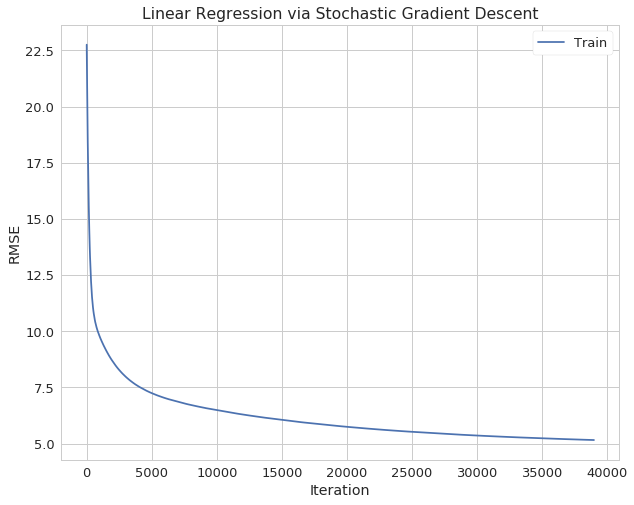

In [63]:
plt.figure(figsize=(10, 8))
plt.plot(model_homegrown_sgd.history["cost"], label="Train")
plt.xlabel("Iteration")
plt.ylabel("RMSE")
plt.title("Linear Regression via Stochastic Gradient Descent")
plt.legend(frameon=True);

Plotting error curves

In [64]:
grad_num = np.array(model_homegrown_sgd.history["grad_num"])
grad = np.array(model_homegrown_sgd.history["grad"])

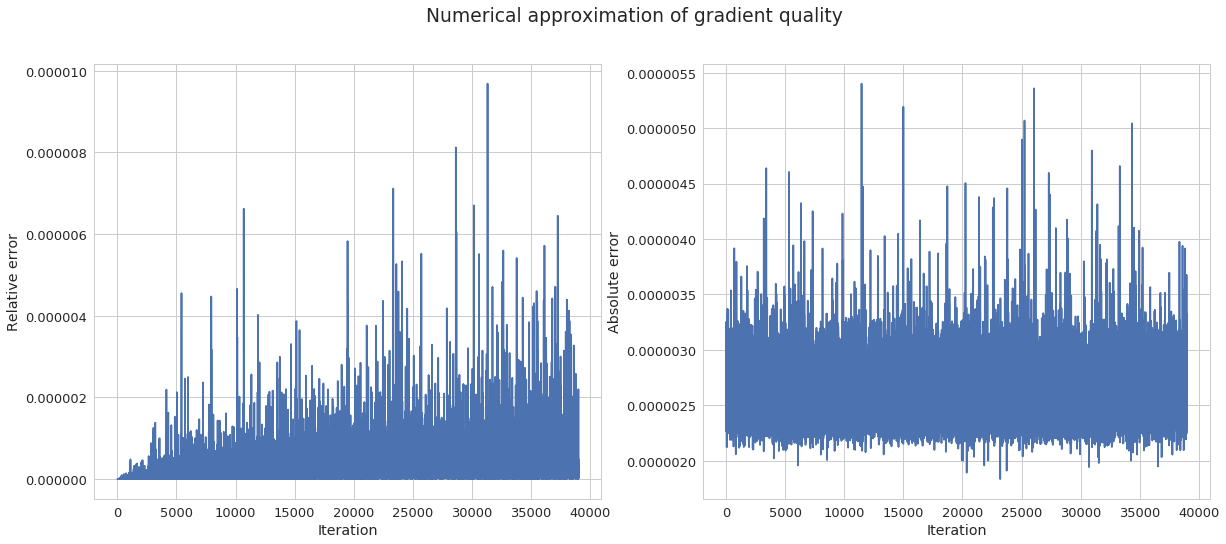

In [65]:
plt.figure(figsize=(20, 8))
plt.suptitle("Numerical approximation of gradient quality")
plt.subplot(121)
plt.plot(relative_error(grad, grad_num))
plt.xlabel("Iteration")
plt.ylabel("Relative error")
plt.subplot(122)
plt.plot(absolute_error(grad, grad_num))
plt.xlabel("Iteration")
plt.ylabel("Absolute error");

Evaluation

In [66]:
models = [model_sk, model_homegrown, model_homegrown_sgd]
models_names = ["Sklearn", "Homegrown Full GD", "Homegrown SGD"]

In [67]:
evaluate(models, metrics, samples, metrics_names, models_names)

,MAE,RMSE,MAPE
Sklearn Train,3.315165,4.652051,16.573489
Sklearn Test,3.191509,4.930662,16.880585
Homegrown Full GD Train,3.565231,5.143644,17.480025
Homegrown Full GD Test,3.395532,5.308220,18.273178
Homegrown SGD Train,3.574082,5.158005,17.503387
Homegrown SGD Test,3.385845,5.299651,18.234963


## L1 and L2 regularization for Linear Regression
Regularization is a way of penalizing the model for excessive complexity. It allows to avoid overfitting.

There are many ways of doing regularization but these two are the major ones:
* **L2-regularization:**
$$
f(\mathbf{w}, b) = \frac{1}{n}\sum_{i=1}^{n}\left[ (\mathbf{w}\cdot\mathbf{x}_i + b) - y_i\right]^2 + \lambda \sum_{j=1}^{m}w_j^2
$$
or in matrix way:
$$
f(\mathbf{w}, b) = \|\text{X}\cdot\mathbf{w} + b\cdot\mathbf{1}_n - \mathbf{y}\|_2^2 + \lambda \|\mathbf{w}\|_2^2
$$
* **L1-regularization:**
$$
f(\mathbf{w}, b) = \frac{1}{n}\sum_{i=1}^{n}\left[ (\mathbf{w}\cdot\mathbf{x}_i + b) - y_i\right]^2 + \lambda \sum_{j=1}^{m}|w_j|
$$
or in matrix way:
$$
f(\mathbf{w}, b) = \|\text{X}\cdot\mathbf{w} + b\cdot\mathbf{1}_n - \mathbf{y}\|_2^2 + \lambda \|\mathbf{w}\|_1
$$

Try to encorporate both of them into the GD solution of Linear Regression starting with L2-regularization. What is the problem then with L1-regularization? What benefits L1 can gives apart from reducing overfitting.

In [68]:
class RegularizedLinearRegressionHomegrown(BasicLinearRegressionHomegrown):
    
    def __init__(self, l1_reg=0.0, l2_reg=0.0):
        # call the constructor of the parent class
        super(RegularizedLinearRegressionHomegrown, self).__init__()
        self.l1_reg = l1_reg
        self.l2_reg = l2_reg
        
    def _grad(self, X, y):
        """
        Calculate the gradient of the objective function 
        with L1 and L2 regularizations

        Args:
            X(ndarray):        train objects
            y(ndarray):        answers for train objects
        Return:
            gradient(ndarray): analytical gradient vector
        """
        pred = np.dot(X, self._theta)
        error = pred - y
        gradient = 2 * np.dot(error, X) / X.shape[0]
        # penalties only for weights
        gradient[1:] += 2 * self.l2_reg * self._theta[1:] + self.l1_reg * np.sign(self._theta[1:])
        return gradient

Create model

In [69]:
model_homegrown_regularized_l2 = RegularizedLinearRegressionHomegrown(l1_reg=0.0, l2_reg=0.1)
model_homegrown_regularized_l1 = RegularizedLinearRegressionHomegrown(l1_reg=1.0, l2_reg=0.0)

Fitting

In [70]:
model_homegrown_regularized_l2.fit(X_train, y_train, max_iter=40000)
model_homegrown_regularized_l1.fit(X_train, y_train, max_iter=40000)

Evaluation

In [71]:
models = [model_sk, model_homegrown, model_homegrown_regularized_l2, model_homegrown_regularized_l1]
models_names = ["Sklearn", "Homegrown", "Homegrown Regularized L2", "Homegrown Regularized L1"]

In [72]:
evaluate(models, metrics, samples, metrics_names, models_names)

,MAE,RMSE,MAPE
Sklearn Train,3.315165,4.652051,16.573489
Sklearn Test,3.191509,4.930662,16.880585
Homegrown Train,3.565231,5.143644,17.480025
Homegrown Test,3.395532,5.308220,18.273178
Homegrown Regularized L2 Train,4.614397,6.614229,22.361781
Homegrown Regularized L2 Test,4.043406,6.052815,21.437170
Homegrown Regularized L1 Train,4.497171,6.410307,22.785422
Homegrown Regularized L1 Test,4.046563,6.061911,22.084906


Comparison of regularized models

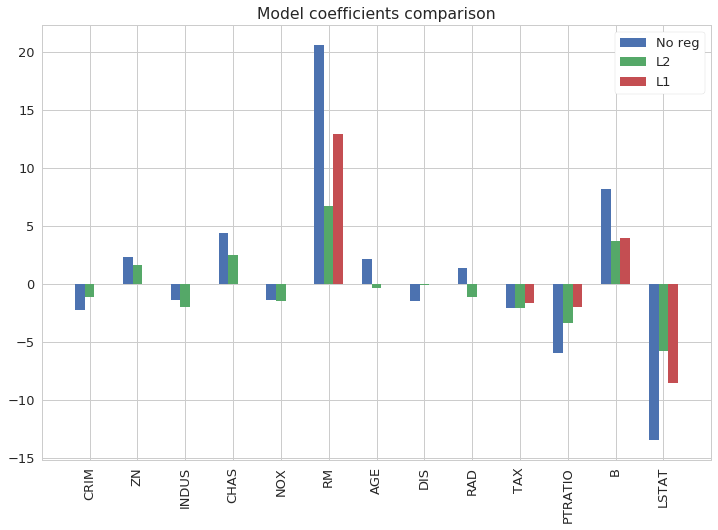

In [73]:
plt.figure(figsize=(12, 8))
plt.bar(np.arange(model_homegrown.coef_.shape[0]) - 0.2, model_homegrown.coef_, width=0.2, label="No reg")
plt.bar(np.arange(model_homegrown_regularized_l2.coef_.shape[0]), model_homegrown_regularized_l2.coef_, width=0.2, label="L2")
plt.bar(np.arange(model_homegrown_regularized_l1.coef_.shape[0]) + 0.2, model_homegrown_regularized_l1.coef_, width=0.2, label="L1")
plt.xticks(np.arange(model_sk.coef_.shape[0]), X.columns, rotation='vertical')
plt.xlim([-1, model_sk.coef_.shape[0]])
plt.title("Model coefficients comparison")
plt.legend();

In [74]:
print("2-norm of weights:\n")
print("{:10s}{:.2f}".format("No reg:", np.linalg.norm(model_homegrown.coef_)))
print("{:10s}{:.2f}".format("L2:", np.linalg.norm(model_homegrown_regularized_l2.coef_)))
print("{:10s}{:.2f}".format("L1:", np.linalg.norm(model_homegrown_regularized_l1.coef_)))

2-norm of weights:

No reg:   27.49
L2:       11.14
L1:       16.18


In [75]:
print("Number of non-zero coefficients:\n")
print("{:10s}{:d}".format("No reg:", np.sum(np.abs(model_homegrown.coef_) > 1e-2)))
print("{:10s}{:d}".format("L2:", np.sum(np.abs(model_homegrown_regularized_l2.coef_) > 1e-2)))
print("{:10s}{:d}".format("L1:", np.sum(np.abs(model_homegrown_regularized_l1.coef_) > 1e-2)))

Number of non-zero coefficients:

No reg:   13
L2:       13
L1:       5


As one can notice L2-regularization greatly reduces the 2-norm of weight vector thereby it prevents overfitting. Regularization constant can be used to control [bias-variance tradeoff](http://scott.fortmann-roe.com/docs/BiasVariance.html).

L1-regularization plays the same role but it also has one very important prorepty: it can work as a feature selector (impose sparsity on the coefficient vector). From mathematical perspective it can be explained as follows: L1-norm is the "closest" approximation to the L0-norm which explicitly equals to the number of non-zero elements. For sure, the ideal feature selector is L0-norm but one can not simply minimize it because of its computationally intractability (due to its combinatorial nature). Thus people usually use L1-norm for that purpose. More intuitive geometrical interpretation can be found [here](https://www.quora.com/Why-is-L1-regularization-supposed-to-lead-to-sparsity-than-L2) or in any other source (lots of them). For more detailed and deep mathematical explanation one can take a look into [compressed sensing](https://en.wikipedia.org/wiki/Compressed_sensing) method introduced by Terence Tao and David Donoho in the early 2000's.

# Optional Assignments:

## Line Search of the step size
Instead of doing a gradient step with the fixed step size ($\alpha=0.0005$) consider it as a variable after choosing the step directon (gradient one) and try to optimize it. In other words solve analyticaly the following 1D optimization problem:

$$
f\left(\boldsymbol{\theta}_{t} - \alpha \cdot \nabla f(\boldsymbol{\theta}_{t})\right) \rightarrow \min_{\alpha}
$$

How does it influence the time in terms of number of iterations?

** Solution **

By the chain rule, using the notation $\nabla_{(1)}\;f$ to denote the derivative of $f$ with respect to its argument:

$$
\newcommand{\btheta}{\boldsymbol{\theta}}
\frac{\partial f(\btheta - \alpha \nabla_{\btheta}\;f(\btheta))}{\partial\alpha} 
    = -(\nabla_{\btheta}\;f(\btheta))^{\text{T}} \nabla_{(1)}\;f(\btheta - \alpha \nabla_{\btheta}\;f(\btheta))
$$

For the regression cost function, we can expand the last term using the expression for $\nabla_{\btheta}\;f(\btheta)$ derived in section 7:

$$
\begin{align}
\nabla_{(1)}\;f(\btheta - \alpha \nabla_{\btheta}\;f(\btheta))
    &= \frac{2}{n}\text{X}^{\text{T}}(\text{X}\cdot\btheta - \mathbf{y}) - 
        \frac{2}{n}\alpha\cdot\text{X}^{\text{T}}\text{X}\cdot\nabla_{\btheta}\;f(\btheta)\\
    &= \nabla_{\btheta}\;f(\btheta) - \frac{2}{n}\alpha\cdot\text{X}^{\text{T}}\text{X}\cdot\nabla_{\btheta}\;f(\btheta)
\end{align}
$$

Substituting into the above, this yields:

$$
\frac{\partial f(\btheta - \alpha \nabla_{\btheta}\;f(\btheta))}{\partial\alpha} 
    = -(\nabla_{\btheta}\;f(\btheta))^{\text{T}} \left[\nabla_{\btheta}\;f(\btheta) - 
        \frac{2}{n}\alpha\cdot\text{X}^{\text{T}}\text{X}\cdot\nabla_{\btheta}\;f(\btheta)\right]
$$

Now setting the partial derivative to zero, we conclude that at a stationary point:

$$
\begin{align}
\alpha^* 
    &= \frac{n}{2} 
        \frac{(\nabla_{\btheta}\;f(\btheta))^{\text{T}}\nabla_{\btheta}\;f(\btheta)}{
            [\text{X}\cdot\nabla_{\btheta}\;f(\btheta)]^{\text{T}}\cdot\text{X}\cdot\nabla_{\btheta}\;f(\btheta)}\\
    &= \frac{n}{2}\left(\frac{\|\nabla_{\btheta}\;f(\btheta)\|_2}{
        \|\text{X}\cdot\nabla_{\btheta}\;f(\btheta)\|_2}\right)^2
\end{align}
$$

By the convexity of the cost function, we are assured that $\alpha^*$ locates a minimum, and by virtue of its construction (as a positive multiple of a square number), that it is positive, as required by the gradient descent algorithm.

The class below incorporates this solution into the gradient descent method of the `BasicLinearRegressionHomegrown` class:

In [76]:
class OptimalStepBasicLinearRegressionHomegrown(BasicLinearRegressionHomegrown):
       
    def __init__(self):
        super(OptimalStepBasicLinearRegressionHomegrown, self).__init__()
        self.history["alpha"] = []
        
    def _gd(self, X, y, max_iter):
        """
        Runs GD and logs error, weigths, gradient at every step.
        Here the optimal step size used with formulas from above.

        Args:
            X(ndarray):      train objects
            y(ndarray):      answers for train objects
            max_iter(int):   number of weight updates
        Return:
            None
        """
        
        for i in range(max_iter):
            
            self.history["coef"].append(self._theta[1:].copy())
            self.history["intercept"].append(self._theta[0].copy())
            
            rmse = self.score(X, y)
            self.history["cost"].append(rmse)

            # calculate gradient
            grad = self._grad(X, y)
            self.history["grad"].append(grad)
            
            # optimum step size
            alpha = X.shape[0] / 2. * (np.linalg.norm(grad) / np.linalg.norm(X.dot(grad))) ** 2
            self.history["alpha"] = alpha
            
            # do gradient step
            self._theta -= alpha * grad

Create model

In [77]:
model_homegrown_optimal_step = OptimalStepBasicLinearRegressionHomegrown()

Fitting

In [78]:
model_homegrown_optimal_step.fit(X_train, y_train, max_iter=40000)

Evaluation

In [79]:
models = [model_sk, model_homegrown, model_homegrown_optimal_step]
models_names = ["Sklearn", "Homegrown", "Homegrown with Optimal step size"]

In [80]:
evaluate(models, metrics, samples, metrics_names, models_names)

,MAE,RMSE,MAPE
Sklearn Train,3.315165,4.652051,16.573489
Sklearn Test,3.191509,4.930662,16.880585
Homegrown Train,3.565231,5.143644,17.480025
Homegrown Test,3.395532,5.308220,18.273178
Homegrown with Optimal step size Train,3.315165,4.652051,16.573489
Homegrown with Optimal step size Test,3.191509,4.930662,16.880585


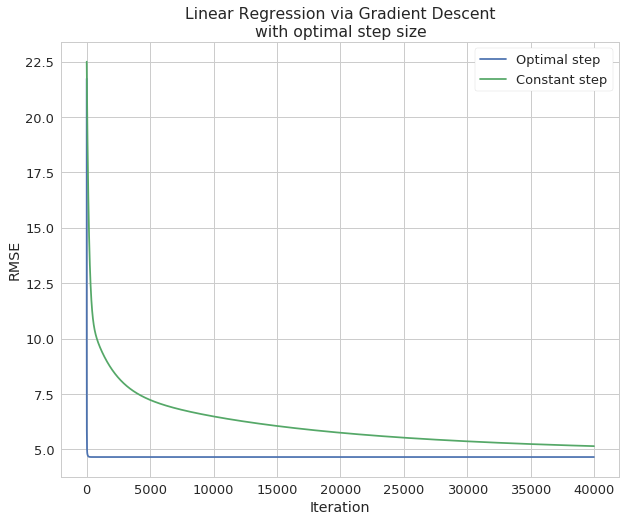

In [81]:
plt.figure(figsize=(10, 8))
plt.plot(model_homegrown_optimal_step.history["cost"], label="Optimal step")
plt.plot(model_homegrown.history["cost"], label="Constant step")
plt.xlabel("Iteration")
plt.ylabel("RMSE")
plt.title("Linear Regression via Gradient Descent\nwith optimal step size")
plt.legend(frameon=True);

As one can notice the convergence is the order of magnitude faster and better it temrs of the loss value